In [1]:
# Random array function
import numpy as np

def get_random_arrays():
    rng = np.random.default_rng(42)
    random_arrays = [rng.integers(low=-10000, high=10000, size=10**i) for i in range(1, 5)]
    for arr in random_arrays:
        print(arr.shape)

    return random_arrays

# Test list
data = [5,7,3,9,4,2,1,8,6]

In [5]:
# Merge function
def merge(left, right):
    result = []
    left_index, right_index = 0, 0

    while left_index < len(left) and right_index < len(right):
        if left[left_index] < right[right_index]:
            result.append(left[left_index])
            left_index += 1
        else:
            result.append(right[right_index])
            right_index += 1

    result.extend(left[left_index:])
    result.extend(right[right_index:])
    print(f"Left over: {left[left_index:]} and Right over: {right[right_index:]}")
    return result

In [8]:
# Test merge
arr1 = [1, 3, 15, 2, 9, 8]
arr2 = [2, 4]

merge(arr1, arr2)

Left over: [15, 2, 9, 8] and Right over: []


[1, 2, 3, 4, 15, 2, 9, 8]

In [ ]:
# Merge sort
def merge_sort(arr):
    if len(arr) <= 1:
        return arr

    mid = len(arr) // 2 # floor division 15 //2 = 7
    left_half = arr[:mid]
    right_half = arr[mid:]

    left_half = merge_sort(left_half)
    right_half = merge_sort(right_half)
    merged = merge(left_half, right_half)

    return merged


In [5]:
# Sort some data
merge_sort(data)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [6]:
# Time sorting
import timeit

timeit.timeit(lambda: merge_sort(data), number=100)

0.000552199999219738

In [7]:
# Make random arrays
random_arrays = get_random_arrays()

(10,)
(100,)
(1000,)
(10000,)


In [8]:
# Compare timeing to built-in
merge_sort_times = [timeit.timeit(lambda: merge_sort(arr), number=100) / 100 for arr in random_arrays]
sorted_times = [timeit.timeit(lambda: sorted(arr), number=100) / 100 for arr in random_arrays]

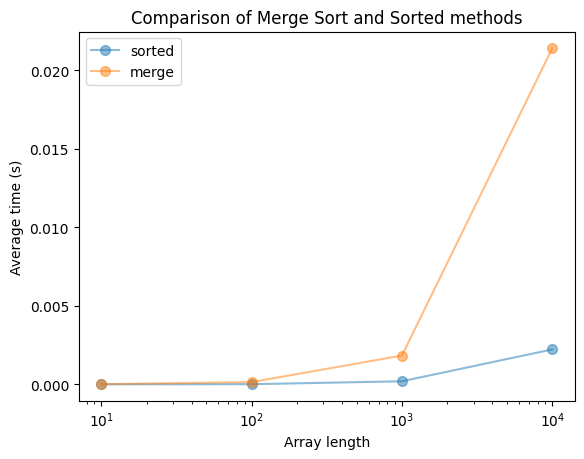

In [9]:
# Plot results
import matplotlib.pyplot as plt

x = [len(arr) for arr in random_arrays]

fig, ax = plt.subplots(1)
ax.plot(x, sorted_times, marker="o", markersize=7, alpha=0.5, label="sorted")
ax.plot(x, merge_sort_times, marker="o", markersize=7, alpha=0.5, label="merge")
ax.set_xscale("log")
ax.set_title("Comparison of Merge Sort and Sorted methods")
ax.set_xlabel("Array length")
ax.set_ylabel("Average time (s)")
ax.legend()
plt.show()
